In [14]:
import pandas as pd

# Replace 'customer.csv' with the actual filename if different
df = pd.read_csv('customer (2).csv')

# Display the first few rows
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


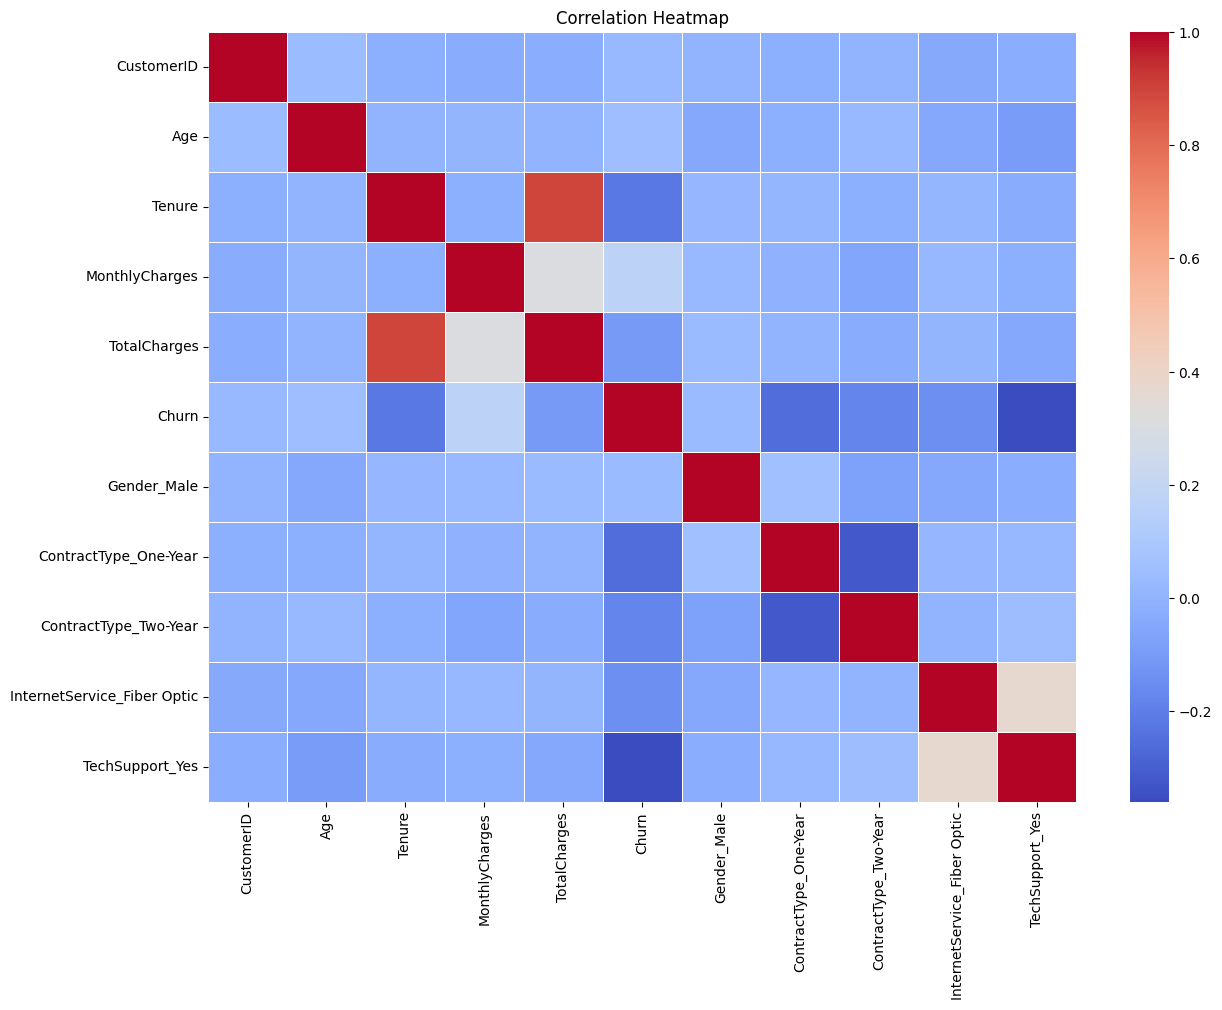

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('customer (2).csv')

# Convert categorical columns to numeric using one-hot encoding (excluding the target 'Churn')
categorical_cols = df.select_dtypes(include='object').columns.drop('Churn')
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert 'Churn' to numeric if needed
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Compute correlation matrix
corr = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('customer (2).csv')

# 1. Identify missing values
missing_values = df.isnull().sum()

# 2. Understand distributions
distributions = df.describe(include='all')

# 3. Detect anomalies (simple outlier detection for numeric columns)
anomalies = {}
for col in df.select_dtypes(include='number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    anomalies[col] = outliers.shape[0]

# Display results
print("Missing values per column:\n", missing_values)
print("\nDistributions:\n", distributions)
print("\nNumber of anomalies (outliers) per numeric column:\n", anomalies)

Missing values per column:
 CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

Distributions:
          CustomerID          Age  Gender      Tenure  MonthlyCharges  \
count   1000.000000  1000.000000    1000  1000.00000     1000.000000   
unique          NaN          NaN       2         NaN             NaN   
top             NaN          NaN  Female         NaN             NaN   
freq            NaN          NaN     538         NaN             NaN   
mean     500.500000    44.674000     NaN    18.97300       74.391290   
std      288.819436     9.797741     NaN    18.89257       25.712083   
min        1.000000    12.000000     NaN     0.00000       30.000000   
25%      250.750000    38.000000     NaN     5.00000       52.357500   
50%      500.500000    45.000000     NaN    13.00000       74.06

In [9]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the CSV file
df = pd.read_csv('customer (2).csv')

# 1. Remove or impute missing values
imputer = SimpleImputer(strategy='mean')
for col in df.select_dtypes(include='number').columns:
    df[col] = imputer.fit_transform(df[[col]])

# For categorical columns, fill missing with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
for col in df.select_dtypes(include='object').columns:
    df[col] = cat_imputer.fit_transform(df[[col]]).ravel()

# 2. Handle categorical features (One-Hot Encoding)
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 3. Normalize data (Standardization)
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the cleaned and processed data
df.head()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges,Gender_Male,ContractType_One-Year,ContractType_Two-Year,InternetService_Fiber Optic,TechSupport_Yes,Churn_Yes
0,-1.730320,0.441751,-0.792930,0.543157,-0.668991,True,False,False,True,True,True
1,-1.726856,-0.170941,-1.004760,-1.467799,-0.893948,True,False,False,True,True,True
2,-1.723391,0.645982,-0.898845,-0.412514,-0.812737,False,False,False,True,False,True
3,-1.719927,1.565021,-0.581101,1.087531,-0.372792,False,True,False,False,True,True
4,-1.716463,-0.273057,0.689875,-0.209395,0.511758,True,False,False,True,False,True


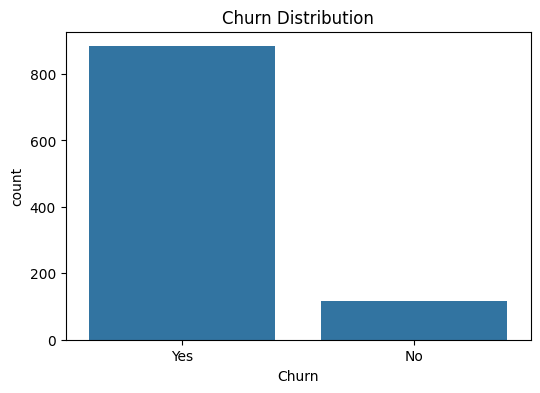

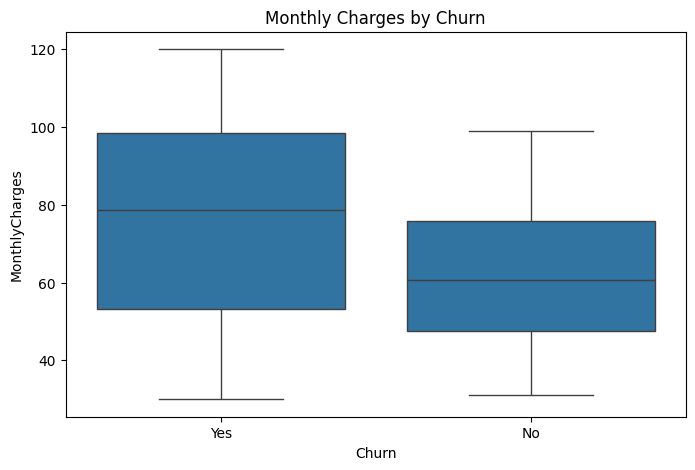

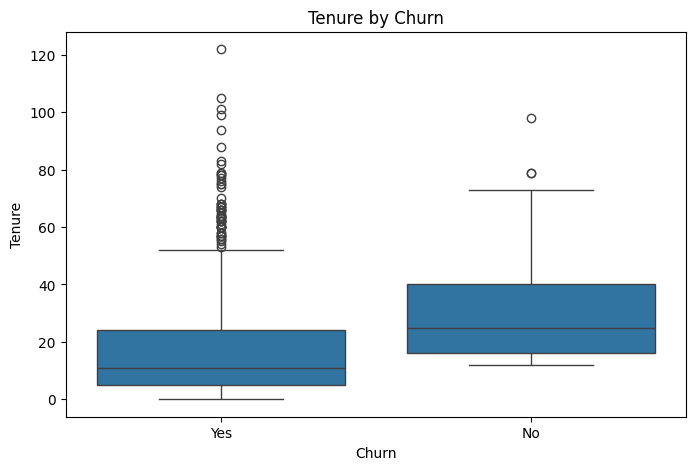

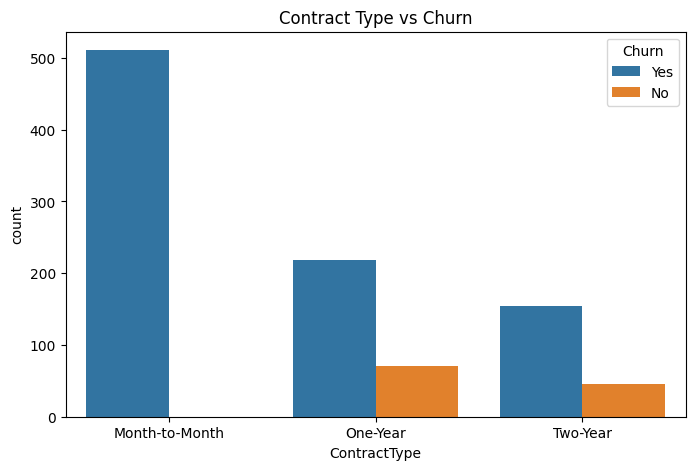

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('customer (2).csv')

# Churn count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Monthly Charges distribution by Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

# Tenure distribution by Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Tenure by Churn')
plt.show()

# Contract Type vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='ContractType', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.show()